### A simple example of sentiment analysis

We establish a connection to Twitter, and pull as many tweets as we can from a major account, to perform sentiment analysis. Sentiment is classified as positive, neutral, or negative, based on a tweet's pure text, once all extraneous content (such as URLs etc) has been removed.



#### First let's specify which account we want to analyze

It's always interesting to look at high profile, frequently used accounts. Write the twitter screen name you want to study below, between the two single quotes, without the @ symbol.

In [1]:
# Enter a Twitter screen name 
ANALYSE_THIS = "realDonaldTrump"

#### Next, let's get our toolbox ready

`tweepy` is a library for accessing Twitter's API  
`pandas` is our trusted toolbox for dataframes  
`numpy` is the best toolbox for various numerical tasks

We also use `display`, `pyplot`, and `seaborn` for various visualization tasks.


In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Connect to Twitter
Establish API connection to Twitter using `credentials.py`

In [3]:
# My access keys are in ./credentials.py
# Importing them in this manner will allow me to 
# use them as variables, below.
from credentials import *    

# API setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with access keys provided through credentials.py
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

#### Pull data from Twitter

The Twitter API allows us to pull only 200 tweets.

In [23]:
# Twitter content received via API
stream = twitter_setup()

# method applied on stream:
#   .timeline() to specify twitter user and number of tweets to pull
#   max 200 tweets for now.
tweets = stream.user_timeline(screen_name=ANALYSE_THIS, count=500)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Show the 10 most recent tweets:
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

10 recent tweets:

RT @realDonaldTrump: Steve is one of the very best in the Senate. He is competing against a failed Democrat Presidential candidate who neve…

RT @SenJohnBarrasso: People are facing challenges all across the country. I sat down with @ShannonBream tonight to discuss how Congress is…

RT @SenShelby: The Senate remains in session this week working to pass monumental legislation to combat the Coronavirus &amp; help the American…

RT @JohnCornyn: Do you know the symptoms of #COVID19? Difficulty breathing, persistent pain or pressure in the chest, confusion, bluish lip…

RT @SenHydeSmith: #Telehealth is a valuable tool to provide care &amp; protect people in this #COVID19pandemic. Pleased @realdonaldtrump &amp; task…

RT @senatemajldr: It is my intention that the Senate will not adjourn until we have passed significant and bold new steps, above and beyond…

RT @SenJohnThune: Everything we’re doing right now is time-sensitive. Just left lunc

#### Create a dataframe

The tweet(s) above are objects in the class `tweets` and `.text` one of the class methods. So we need to create dataframes, using these objects, to take advantage of *pandas* tools. We can dissect the structure of the class with 
`print(dir(tweets[0]))`

In [24]:
# The data frame tdf (Tweets Data Frame) comprises
# the text from every item in the tweets collection
# and we assign the column label 'Tweets'
tdf = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Display a few elements of tdf to make sure the 
# conversion worked.
display(tdf.head(5))


,Tweets
0,RT @realDonaldTrump: Steve is one of the very ...
1,RT @SenJohnBarrasso: People are facing challen...
2,RT @SenShelby: The Senate remains in session t...
3,RT @JohnCornyn: Do you know the symptoms of #C...
4,RT @SenHydeSmith: #Telehealth is a valuable to...


#### Enrich the dataframe

The dataframe above shows minimal data, but there is a wealth of information "hiding" inside the tweet objects. We extract some of that information to enrich the dataframe.

In [25]:
# Time to expand tdf with information about:
#       len: number of characters in tweet
#        ID: tweet's id
#      Date: date tweet was sent
#    Source: device used to send tweet
#     Likes: how many so far
#       RTs: number of retweets
#
# Use numpy's array to add the new columns in the dataframe tdf

tdf['len']    = np.array([len(tweet.text) for tweet in tweets])
tdf['ID']     = np.array([tweet.id for tweet in tweets])
tdf['Date']   = np.array([tweet.created_at for tweet in tweets])
tdf['Source'] = np.array([tweet.source for tweet in tweets])
tdf['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
tdf['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# quick printout to get a sense of what the dataframe looks now
display(tdf.head(5))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @realDonaldTrump: Steve is one of the very ...,140,1240862231593725952,2020-03-20 04:46:24,Twitter for iPhone,0,9478
1,RT @SenJohnBarrasso: People are facing challen...,139,1240861741430554624,2020-03-20 04:44:27,Twitter for iPhone,0,2849
2,RT @SenShelby: The Senate remains in session t...,144,1240861506968977409,2020-03-20 04:43:32,Twitter for iPhone,0,2305
3,RT @JohnCornyn: Do you know the symptoms of #C...,140,1240861459053248512,2020-03-20 04:43:20,Twitter for iPhone,0,3109
4,RT @SenHydeSmith: #Telehealth is a valuable to...,148,1240861417714089985,2020-03-20 04:43:10,Twitter for iPhone,0,2100


### Average number of characters per tweet

In [26]:
averageCharacters = np.mean(tdf['len'])

print("The lenght's average in tweets: {}".format(averageCharacters))

The lenght's average in tweets: 119.78


#### Likes and retweets

In [27]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(tdf['Likes'])
rt_max  = np.max(tdf['RTs'])

fav = tdf[tdf.Likes == fav_max].index[0]
rt  = tdf[tdf.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(tdf['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(tdf['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(tdf['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(tdf['len'][rt]))

The tweet with more likes is: 
THE UNITED STATES LOVES ITALY! https://t.co/DESUJ4QM41
Number of likes: 631632
54 characters.

The tweet with more retweets is: 
THE UNITED STATES LOVES ITALY! https://t.co/DESUJ4QM41
Number of retweets: 112086
54 characters.



#### Times series

How do the tweets' characteristics change over time? For example, is there a pattern in the number of characters? The likes? The retweets?

In [28]:
# Time series for data:
# tlen: timeseries of tweets' length (number of characters)
# tfav: timeseries of tweets' likes
# tret: timeseries of tweets' retweets
#
# All series below are defined against 'Date' -- hence, timeseries

tlen = pd.Series(data=tdf['len'].values, index=tdf['Date'])
tfav = pd.Series(data=tdf['Likes'].values, index=tdf['Date'])
tret = pd.Series(data=tdf['RTs'].values, index=tdf['Date'])


#### Plot tweet length timeseries
Not much pattern here.

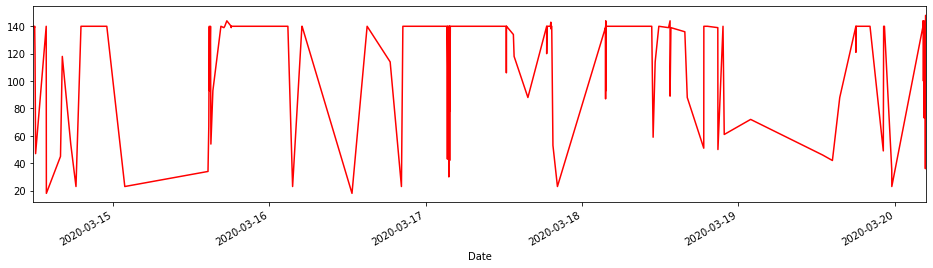

In [29]:
tlen.plot(figsize=(16,4), color='r');




#### Plot timeseries for likes

Not much help here; no discernible pattern.

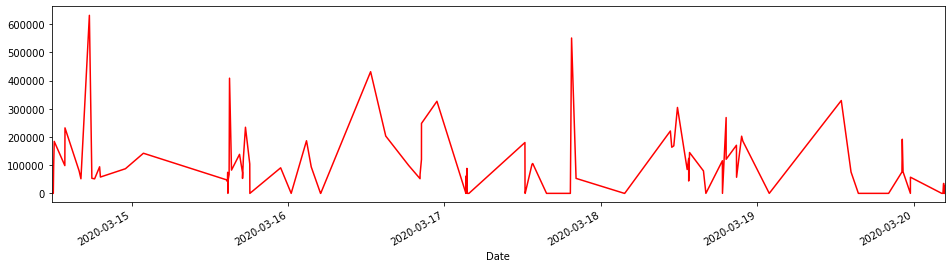

In [30]:
tfav.plot(figsize=(16,4), color='r');

#### Plot timeseries for retweets

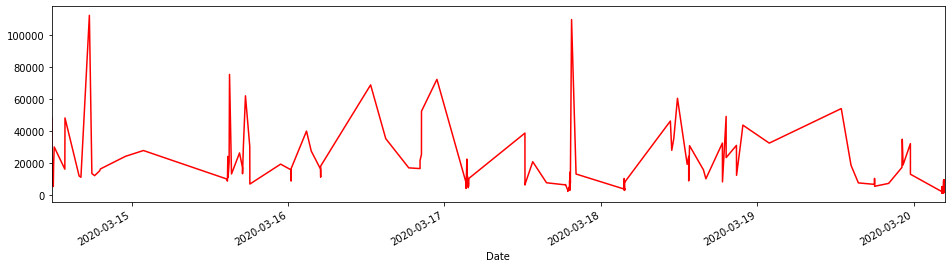

In [31]:
tret.plot(figsize=(16,4), color='r');

#### Where are they sent from?

Tweets are sent from a variety of sources (devices), such as desktop applications, smartphones, websites, etc. We look at the `Source` column of our dataframe to see how many different sources are used. We start with an empty array (`sources[]`) and everytime we detect a new source in the dataframe, we add it to this array.

In [32]:
# Obtain all possible sources:
sources = []
for source in tdf['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


#### Pie Chart
How often is a source used in comparison to others? A pie-chart will provide some insight.

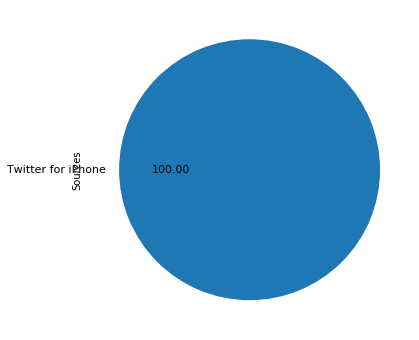

In [33]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

# Go through each tweet, check its Source, and increase
# the corresponding element of the percent vector
for source in tdf['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100 # normalize percent vector to 100.

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')

pie_chart

pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

#### Sentiment analysis

We use the `textblob` library to analyze sentiment, since it has a nicely trained classifier already built-in. The sentiment analysis method in `textblob` works well with plain text, so first we must clean up the tweets' text and remove any special characters, emoticons, URLs, etc. We accomplish that with the regular expression package `re`. Note that while `textblob`'s sentiment analysis returns a continuum of real numbers, our function below maps polarity to just three values: -1 for negative tweets, 0 for neutral, and +1 for positive.

In [48]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    


#### Further enrichment of our dataframe

We add one more columb to `tdf` to contain the categorical polarity value, i.e., -1 for negative content, 0 for neutral, +1 for positive.

In [53]:
# We create a column with the result of the analysis:
tdf['Sentiment'] = np.array([ analize_sentiment(tweet) for tweet in tdf['Tweets'] ])

# Display the updated dataframe with the new column:
display(tdf.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,RT @realDonaldTrump: Steve is one of the very ...,140,1240862231593725952,2020-03-20 04:46:24,Twitter for iPhone,0,9478,1
1,RT @SenJohnBarrasso: People are facing challen...,139,1240861741430554624,2020-03-20 04:44:27,Twitter for iPhone,0,2849,-1
2,RT @SenShelby: The Senate remains in session t...,144,1240861506968977409,2020-03-20 04:43:32,Twitter for iPhone,0,2305,0
3,RT @JohnCornyn: Do you know the symptoms of #C...,140,1240861459053248512,2020-03-20 04:43:20,Twitter for iPhone,0,3109,0
4,RT @SenHydeSmith: #Telehealth is a valuable to...,148,1240861417714089985,2020-03-20 04:43:10,Twitter for iPhone,0,2100,1
5,RT @senatemajldr: It is my intention that the ...,140,1240861235899518976,2020-03-20 04:42:27,Twitter for iPhone,0,9731,1
6,RT @SenJohnThune: Everything we’re doing right...,144,1240861186960261120,2020-03-20 04:42:15,Twitter for iPhone,0,1974,1
7,RT @SenCoryGardner: We need to provide real re...,139,1240861150990012416,2020-03-20 04:42:07,Twitter for iPhone,0,1964,1
8,RT @marcorubio: Made good progress on getting ...,140,1240861076880842754,2020-03-20 04:41:49,Twitter for iPhone,0,2242,1
9,RT @SenateGOP: Conference Chairman @SenJohnBar...,140,1240860970223894529,2020-03-20 04:41:24,Twitter for iPhone,0,1948,0


#### New dataframes

We may want to look separately at positive, neutral, or negative content. So we create three new dataframes to contain only positive, neutral, or negative tweets. Positive tweets are stored in dataframe `pos_tweets` which is the result of a selection operation on our original dataframe `tdf` for `Sentiment` values > 0. Similar selection criteria are applied for neutral and negative tweets.

In [50]:
# We create a column with the result of the analysis:
tdf['Sentiment'] = np.array([ analize_sentiment(tweet) for tweet in tdf['Tweets'] ])

# Display the updated dataframe with the new column:
display(tdf.head(3))

# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(tdf['Tweets']) if tdf['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(tdf['Tweets']) if tdf['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(tdf['Tweets']) if tdf['Sentiment'][index] < 0]

,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,RT @realDonaldTrump: Steve is one of the very ...,140,1240862231593725952,2020-03-20 04:46:24,Twitter for iPhone,0,9478,1
1,RT @SenJohnBarrasso: People are facing challen...,139,1240861741430554624,2020-03-20 04:44:27,Twitter for iPhone,0,2849,-1
2,RT @SenShelby: The Senate remains in session t...,144,1240861506968977409,2020-03-20 04:43:32,Twitter for iPhone,0,2305,0


#### Report percentages

In [51]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(tdf['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(tdf['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(tdf['Tweets'])))

Percentage of positive tweets: 51.5%
Percentage of neutral tweets: 31.0%
Percentage of negative tweets: 17.5%


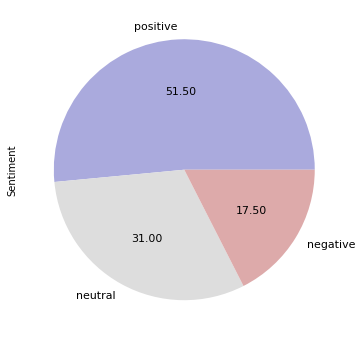

In [52]:
# Pie chart:

sentimentPieData = [len(pos_tweets)*100/len(tdf['Tweets']), len(neu_tweets)*100/len(tdf['Tweets']), len(neg_tweets)*100/len(tdf['Tweets'])]
sentimentPieLabels = ['positive','neutral','negative']
sentimentPieColors = ['#aaaadd','#dddddd','#ddaaaa']

pie_chart = pd.Series(sentimentPieData,index=sentimentPieLabels, name="Sentiment")
pie_chart.plot.pie(fontsize=11, autopct='%.2f', colors=sentimentPieColors,figsize=(6, 6));

In [54]:

def polasubj(tweet):
    '''
    A function to return a category based both polarity and subjectivity
    '''
    analysis = TextBlob(clean_tweet(tweet))
    pola = analysis.sentiment.polarity
    subj = analysis.sentiment.subjectivity
    ps = pola * subj
    
    if pola == 0:
        if subj < 0.5:
            return -1
        else:
            return 1
    elif pola > 0:
        return 1
    else:
        return -1

,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment,Sentiment2
0,RT @realDonaldTrump: Steve is one of the very ...,140,1240862231593725952,2020-03-20 04:46:24,Twitter for iPhone,0,9478,1,1
1,RT @SenJohnBarrasso: People are facing challen...,139,1240861741430554624,2020-03-20 04:44:27,Twitter for iPhone,0,2849,-1,-1
2,RT @SenShelby: The Senate remains in session t...,144,1240861506968977409,2020-03-20 04:43:32,Twitter for iPhone,0,2305,0,-1
3,RT @JohnCornyn: Do you know the symptoms of #C...,140,1240861459053248512,2020-03-20 04:43:20,Twitter for iPhone,0,3109,0,-1
4,RT @SenHydeSmith: #Telehealth is a valuable to...,148,1240861417714089985,2020-03-20 04:43:10,Twitter for iPhone,0,2100,1,1
5,RT @senatemajldr: It is my intention that the ...,140,1240861235899518976,2020-03-20 04:42:27,Twitter for iPhone,0,9731,1,1
6,RT @SenJohnThune: Everything we’re doing right...,144,1240861186960261120,2020-03-20 04:42:15,Twitter for iPhone,0,1974,1,1
7,RT @SenCoryGardner: We need to provide real re...,139,1240861150990012416,2020-03-20 04:42:07,Twitter for iPhone,0,1964,1,1
8,RT @marcorubio: Made good progress on getting ...,140,1240861076880842754,2020-03-20 04:41:49,Twitter for iPhone,0,2242,1,1
9,RT @SenateGOP: Conference Chairman @SenJohnBar...,140,1240860970223894529,2020-03-20 04:41:24,Twitter for iPhone,0,1948,0,-1


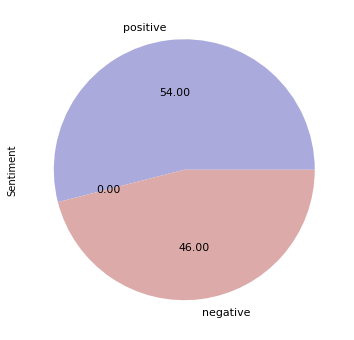

In [55]:
# We create a column with the result of the analysis:
tdf['Sentiment2'] = np.array([ polasubj(tweet) for tweet in tdf['Tweets'] ])

# Display the updated dataframe with the new column:
display(tdf.head(10))


# We construct lists with classified tweets:

pos_tweets2 = [ tweet for index, tweet in enumerate(tdf['Tweets']) if tdf['Sentiment2'][index] > 0]
neu_tweets2 = [ tweet for index, tweet in enumerate(tdf['Tweets']) if tdf['Sentiment2'][index] == 0]
neg_tweets2 = [ tweet for index, tweet in enumerate(tdf['Tweets']) if tdf['Sentiment2'][index] < 0]

# Pie chart:

sentimentPieData = [len(pos_tweets2)*100/len(tdf['Tweets']), len(neu_tweets2)*100/len(tdf['Tweets']), len(neg_tweets2)*100/len(tdf['Tweets'])]
sentimentPieLabels = ['positive','neutral','negative']
sentimentPieColors = ['#aaaadd','#dddddd','#ddaaaa']

pie_chart = pd.Series(sentimentPieData,index=sentimentPieLabels, name="Sentiment")
pie_chart.plot.pie(fontsize=11, autopct='%.2f', colors=sentimentPieColors,figsize=(6, 6));
